## Kerr Gate

In the Fock basis, rotation gate acts with $e^{i\phi\hat{n}}$.

In comparison, Kerr gates tranform with $e^{i\phi\kappa\hat{n}^2}$. The $^2$ makes the state non-Gaussian and thus transforms the shape of the state significantly.

In [5]:
import strawberryfields as sf
from strawberryfields.ops import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [6]:
prog = sf.Program(1)
# use the fock backend and define the argument cutoff_dim
eng = sf.Engine("fock", backend_options={"cutoff_dim":10})

with prog.context as q:
    kappa = 1
    Dgate(1) | q[0]
    Kgate(kappa) | q[0]
    
state = eng.run(prog).state

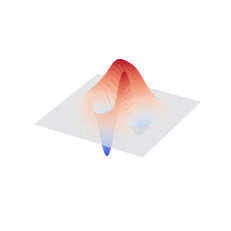

In [7]:
fig = plt.figure()

X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)

X, P = np.meshgrid(X, P)

ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap=cm.coolwarm, rstride=1, cstride=1, linewidth=0, antialiased=True)

#fig.set_size_inches(4.8, 5)
ax.set_axis_off()

plt.savefig("kerr.png", dpi=1080, transparent=True, bbox_inches='tight', pad_inches=0)

The coherent state is morphedaftre the Kerr gate is applied at different strengths.